In [5]:
import pandas as pd
import numpy as np

In [14]:
important_columns = ['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR', 'MaxH', 'MaxD', 'MaxA']
columns_to_rename = {
    'Date': 'date',
    'Time': 'time',
    'HomeTeam': 'home_team',
    'AwayTeam': 'away_team',
    'FTHG': 'full_time_home_goals',
    'FTAG': 'full_time_away_goals',
    'FTR': 'full_time_result',
    'HTHG': 'first_half_home_goals',
    'HTAG': 'first_half_away_goals',
    'HTR': 'first_half_result',
    'HS': 'home_shots',
    'AS': 'away_shots',
    'HST': 'home_target_shots',
    'AST': 'away_target_shots',
    'HF': 'fouls_home',
    'AF': 'fouls_away',
    'HC': 'corners_home',
    'AC': 'corners_away',
    'HY': 'yellow_cards_home',
    'AY': 'yellow_cards_away',
    'HR': 'red_cards_home',
    'AR': 'red_cards_away',
    'MaxH': 'max_odds_home_win',
    'MaxD': 'max_odds_draw',
    'MaxA': 'maximum_odds_away_win'
}



def five_years_ligue_history(ligue_urls):
    five_years_history = pd.DataFrame()
    for url in ligue_urls:
        ligue_data = pd.read_csv(url, sep=',')

        ligue_important_data = ligue_data[important_columns]

        five_years_history = pd.concat([five_years_history, ligue_important_data], axis=0)
    
    five_years_history.reset_index(inplace=True, drop=True)
    five_years_history.rename(columns=columns_to_rename, inplace=True)
    five_years_history['date'] = pd.to_datetime(five_years_history['date'], format='mixed')

    
    return five_years_history        

In [17]:
eng_urls = ['https://www.football-data.co.uk/mmz4281/2021/E0.csv', 'https://www.football-data.co.uk/mmz4281/2122/E0.csv',
            'https://www.football-data.co.uk/mmz4281/2223/E0.csv', 'https://www.football-data.co.uk/mmz4281/2324/E0.csv', 
           'https://www.football-data.co.uk/mmz4281/2425/E0.csv']
eng_data = five_years_ligue_history(eng_urls) 
eng_data

,date,time,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,first_half_home_goals,first_half_away_goals,first_half_result,...,fouls_away,corners_home,corners_away,yellow_cards_home,yellow_cards_away,red_cards_home,red_cards_away,max_odds_home_win,max_odds_draw,maximum_odds_away_win
0,2020-12-09,12:30,Fulham,Arsenal,0,3,A,0,1,A,...,12,2,3,2,2,0,0,6.55,4.55,1.60
1,2020-12-09,15:00,Crystal Palace,Southampton,1,0,H,1,0,H,...,11,7,3,2,1,0,0,3.36,3.36,2.50
2,2020-12-09,17:30,Liverpool,Leeds,4,3,H,3,2,H,...,6,9,0,1,0,0,0,1.35,6.50,10.75
3,2020-12-09,20:00,West Ham,Newcastle,0,2,A,0,0,D,...,7,8,7,2,2,0,0,2.24,3.70,3.60
4,2020-09-13,14:00,West Brom,Leicester,0,3,A,0,0,D,...,9,2,5,1,1,0,0,4.00,3.82,2.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,2025-02-26,19:30,Man United,Ipswich,3,2,H,2,2,D,...,16,5,6,4,4,1,0,1.56,4.75,6.50
1787,2025-02-26,19:30,Nott'm Forest,Arsenal,0,0,D,0,0,D,...,17,3,11,1,1,0,0,4.10,3.60,2.02
1788,2025-02-26,19:30,Tottenham,Man City,0,1,A,0,1,A,...,15,8,3,3,0,0,0,3.35,4.25,2.10
1789,2025-02-26,20:15,Liverpool,Newcastle,2,0,H,1,0,H,...,11,4,2,0,1,0,0,1.54,5.00,6.10


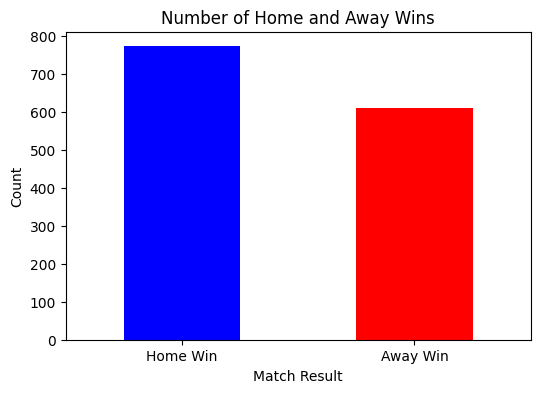

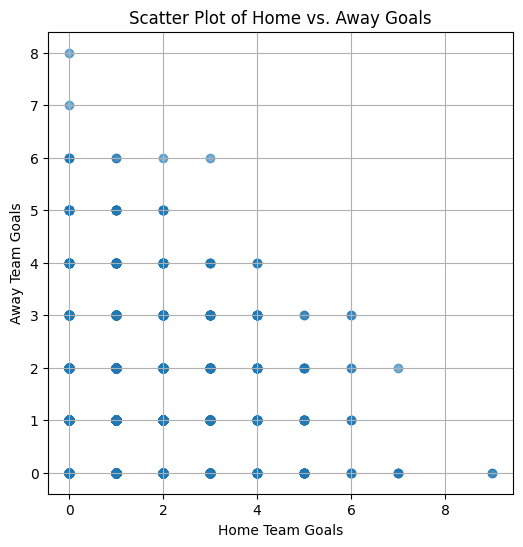

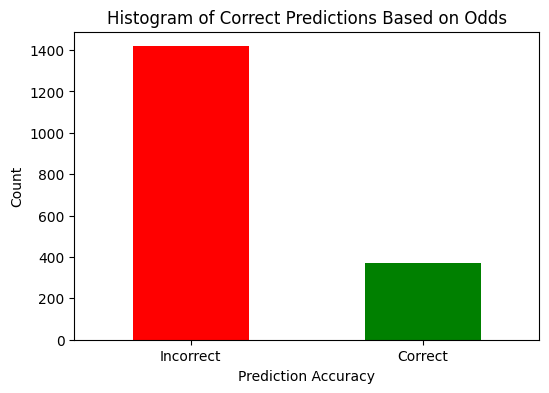

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = eng_data

# 1. Гистограмма побед хозяев и гостей
df['match_result'] = df.apply(lambda row: 'Home Win' if row['full_time_home_goals'] > row['full_time_away_goals'] 
                              else ('Away Win' if row['full_time_home_goals'] < row['full_time_away_goals'] 
                                    else 'Draw'), axis=1)

win_counts = df['match_result'].value_counts()

plt.figure(figsize=(6, 4))
win_counts[['Home Win', 'Away Win']].plot(kind='bar', color=['blue', 'red'])
plt.title("Number of Home and Away Wins")
plt.xlabel("Match Result")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 2. Диаграмма рассеяния (голы хозяев vs. голы гостей)
plt.figure(figsize=(6, 6))
plt.scatter(df['full_time_home_goals'], df['full_time_away_goals'], alpha=0.6)
plt.xlabel("Home Team Goals")
plt.ylabel("Away Team Goals")
plt.title("Scatter Plot of Home vs. Away Goals")
plt.grid(True)
plt.show()

# 3. Гистограмма правильных прогнозов
df['predicted_result'] = df.apply(lambda row: 'Home Win' if row['max_odds_home_win'] > row['max_odds_draw'] and row['max_odds_home_win'] > row['maximum_odds_away_win'] 
                                  else ('Away Win' if row['maximum_odds_away_win'] > row['max_odds_home_win'] and row['maximum_odds_away_win'] > row['max_odds_draw'] 
                                        else 'Draw'), axis=1)

df['correct_prediction'] = (df['match_result'] == df['predicted_result']).astype(int)

plt.figure(figsize=(6, 4))
df['correct_prediction'].value_counts().sort_index().plot(kind='bar', color=['red', 'green'])
plt.xticks([0, 1], ['Incorrect', 'Correct'], rotation=0)
plt.title("Histogram of Correct Predictions Based on Odds")
plt.xlabel("Prediction Accuracy")
plt.ylabel("Count")
plt.show()


In [19]:
ger_urls = ['https://www.football-data.co.uk/mmz4281/2021/D1.csv', 'https://www.football-data.co.uk/mmz4281/2122/D1.csv', 
           'https://www.football-data.co.uk/mmz4281/2223/D1.csv', 'https://www.football-data.co.uk/mmz4281/2324/D1.csv', 
           'https://www.football-data.co.uk/mmz4281/2425/D1.csv']
ger_data = five_years_ligue_history(ger_urls) 
ger_data

,date,time,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,first_half_home_goals,first_half_away_goals,first_half_result,...,fouls_away,corners_home,corners_away,yellow_cards_home,yellow_cards_away,red_cards_home,red_cards_away,max_odds_home_win,max_odds_draw,maximum_odds_away_win
0,2020-09-18,19:30,Bayern Munich,Schalke 04,8,0,H,3,0,H,...,12,9,2,1,2,0,0,1.15,14.00,34.00
1,2020-09-19,14:30,Ein Frankfurt,Bielefeld,1,1,D,0,0,D,...,13,14,3,2,2,0,0,1.71,4.50,5.25
2,2020-09-19,14:30,FC Koln,Hoffenheim,2,3,A,1,2,A,...,13,1,6,0,0,0,0,2.70,3.88,2.69
3,2020-09-19,14:30,Stuttgart,Freiburg,2,3,A,0,2,A,...,16,7,2,2,2,0,0,2.33,3.70,3.35
4,2020-09-19,14:30,Union Berlin,Augsburg,1,3,A,0,1,A,...,9,8,1,2,0,0,0,2.45,3.38,3.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,2025-02-22,14:30,Wolfsburg,Bochum,1,1,D,0,0,D,...,15,3,5,2,3,0,0,1.60,4.64,6.00
1427,2025-02-22,17:30,Dortmund,Union Berlin,6,0,H,2,0,H,...,11,5,3,2,2,0,0,1.58,4.70,6.00
1428,2025-02-23,14:30,RB Leipzig,Heidenheim,2,2,D,1,2,A,...,15,7,4,3,3,0,0,1.37,5.77,8.70
1429,2025-02-23,16:30,Bayern Munich,Ein Frankfurt,4,0,H,1,0,H,...,7,4,1,1,1,0,0,1.34,6.80,9.50


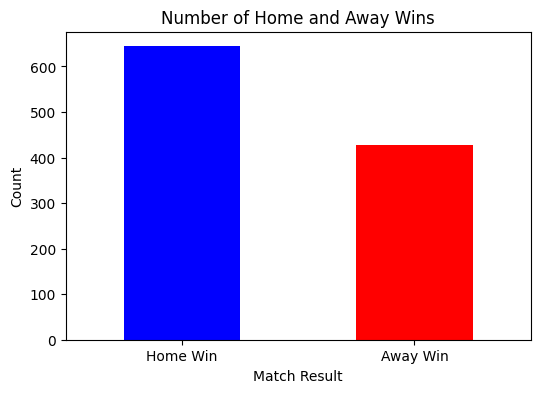

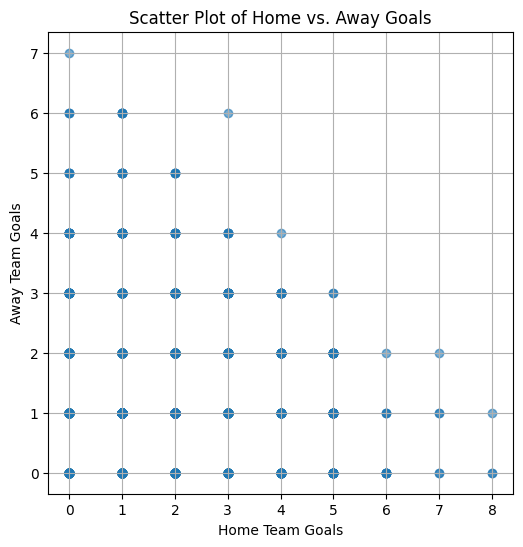

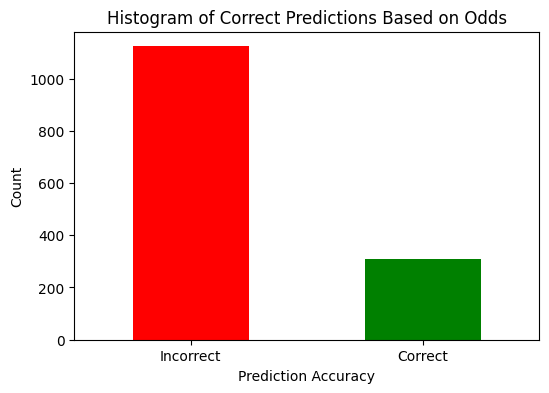

In [20]:


df_1 = ger_data

df_1['match_result'] = df_1.apply(lambda row: 'Home Win' if row['full_time_home_goals'] > row['full_time_away_goals'] 
                                  else ('Away Win' if row['full_time_home_goals'] < row['full_time_away_goals'] 
                                        else 'Draw'), axis=1)

# 1. Гистограмма побед хозяев и гостей
win_counts = df_1['match_result'].value_counts()

plt.figure(figsize=(6, 4))
win_counts[['Home Win', 'Away Win']].plot(kind='bar', color=['blue', 'red'])
plt.title("Number of Home and Away Wins")
plt.xlabel("Match Result")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 2. Диаграмма рассеяния (голы хозяев vs. голы гостей)
plt.figure(figsize=(6, 6))
plt.scatter(df_1['full_time_home_goals'], df_1['full_time_away_goals'], alpha=0.6)
plt.xlabel("Home Team Goals")
plt.ylabel("Away Team Goals")
plt.title("Scatter Plot of Home vs. Away Goals")
plt.grid(True)
plt.show()

# 3. Гистограмма правильных прогнозов
df_1['predicted_result'] = df_1.apply(lambda row: 'Home Win' if row['max_odds_home_win'] > row['max_odds_draw'] and row['max_odds_home_win'] > row['maximum_odds_away_win'] 
                                      else ('Away Win' if row['maximum_odds_away_win'] > row['max_odds_home_win'] and row['maximum_odds_away_win'] > row['max_odds_draw'] 
                                            else 'Draw'), axis=1)

df_1['correct_prediction'] = (df_1['match_result'] == df_1['predicted_result']).astype(int)

plt.figure(figsize=(6, 4))
df_1['correct_prediction'].value_counts().sort_index().plot(kind='bar', color=['red', 'green'])
plt.xticks([0, 1], ['Incorrect', 'Correct'], rotation=0)
plt.title("Histogram of Correct Predictions Based on Odds")
plt.xlabel("Prediction Accuracy")
plt.ylabel("Count")
plt.show()


In [22]:
spain_urls = ['https://www.football-data.co.uk/mmz4281/2021/SP1.csv', 'https://www.football-data.co.uk/mmz4281/2122/SP1.csv', 
             'https://www.football-data.co.uk/mmz4281/2223/SP1.csv', 'https://www.football-data.co.uk/mmz4281/2324/SP1.csv', 
             'https://www.football-data.co.uk/mmz4281/2425/SP1.csv'
             ]
spain_data = five_years_ligue_history(spain_urls) 
spain_data

,date,time,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,first_half_home_goals,first_half_away_goals,first_half_result,...,fouls_away,corners_home,corners_away,yellow_cards_home,yellow_cards_away,red_cards_home,red_cards_away,max_odds_home_win,max_odds_draw,maximum_odds_away_win
0,2020-12-09,15:00,Eibar,Celta,0,0,D,0,0,D,...,13,3,3,4,4,1,0,2.66,3.27,3.13
1,2020-12-09,17:30,Granada,Ath Bilbao,2,0,H,0,0,D,...,10,1,2,3,4,0,0,2.92,3.22,2.89
2,2020-12-09,20:00,Cadiz,Osasuna,0,2,A,0,1,A,...,21,6,2,2,2,0,0,2.93,3.08,2.97
3,2020-09-13,13:00,Alaves,Betis,0,1,A,0,0,D,...,17,6,4,3,3,0,0,2.99,3.35,2.76
4,2020-09-13,15:00,Valladolid,Sociedad,1,1,D,1,0,H,...,17,5,3,4,1,0,0,3.04,3.38,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,2025-02-23,13:00,Ath Bilbao,Valladolid,7,1,H,4,0,H,...,5,4,4,2,3,0,1,1.18,8.45,23.00
1766,2025-02-23,15:15,Real Madrid,Girona,2,0,H,1,0,H,...,7,11,5,0,2,0,0,1.31,6.60,10.50
1767,2025-02-23,17:30,Getafe,Betis,1,2,A,0,1,A,...,20,2,5,3,0,1,1,2.70,3.19,3.05
1768,2025-02-23,20:00,Sociedad,Leganes,3,0,H,1,0,H,...,13,3,3,3,3,0,0,1.59,4.01,8.00


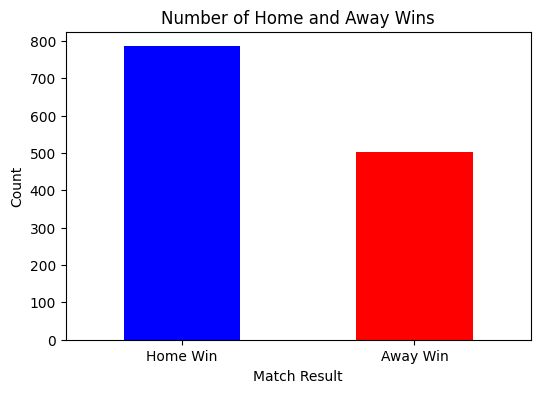

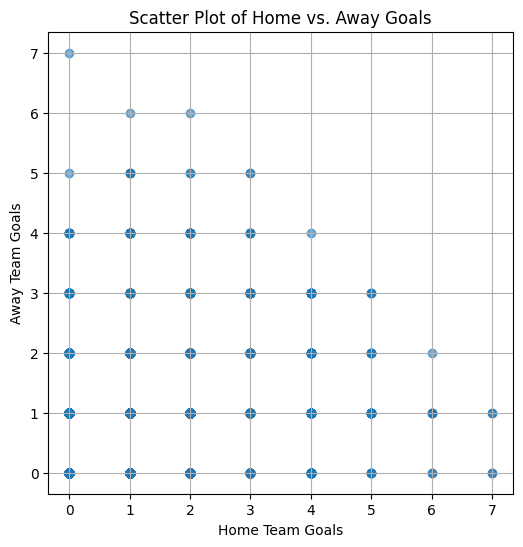

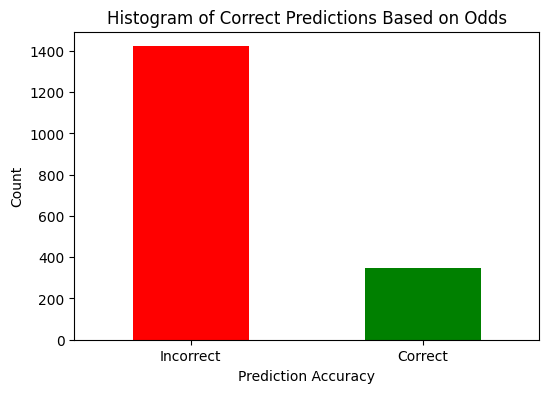

In [23]:
df_2 = spain_data
df_2['match_result'] = df_2.apply(lambda row: 'Home Win' if row['full_time_home_goals'] > row['full_time_away_goals'] 
                                  else ('Away Win' if row['full_time_home_goals'] < row['full_time_away_goals'] 
                                        else 'Draw'), axis=1)

# 1. Гистограмма побед хозяев и гостей
win_counts = df_2['match_result'].value_counts()

plt.figure(figsize=(6, 4))
win_counts[['Home Win', 'Away Win']].plot(kind='bar', color=['blue', 'red'])
plt.title("Number of Home and Away Wins")
plt.xlabel("Match Result")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 2. Диаграмма рассеяния (голы хозяев vs. голы гостей)
plt.figure(figsize=(6, 6))
plt.scatter(df_2['full_time_home_goals'], df_2['full_time_away_goals'], alpha=0.6)
plt.xlabel("Home Team Goals")
plt.ylabel("Away Team Goals")
plt.title("Scatter Plot of Home vs. Away Goals")
plt.grid(True)
plt.show()

# 3. Гистограмма правильных прогнозов
df_2['predicted_result'] = df_2.apply(lambda row: 'Home Win' if row['max_odds_home_win'] > row['max_odds_draw'] and row['max_odds_home_win'] > row['maximum_odds_away_win'] 
                                      else ('Away Win' if row['maximum_odds_away_win'] > row['max_odds_home_win'] and row['maximum_odds_away_win'] > row['max_odds_draw'] 
                                            else 'Draw'), axis=1)

df_2['correct_prediction'] = (df_2['match_result'] == df_2['predicted_result']).astype(int)

plt.figure(figsize=(6, 4))
df_2['correct_prediction'].value_counts().sort_index().plot(kind='bar', color=['red', 'green'])
plt.xticks([0, 1], ['Incorrect', 'Correct'], rotation=0)
plt.title("Histogram of Correct Predictions Based on Odds")
plt.xlabel("Prediction Accuracy")
plt.ylabel("Count")
plt.show()


In [24]:
italy_urls = ['https://www.football-data.co.uk/mmz4281/2021/I1.csv', 'https://www.football-data.co.uk/mmz4281/2122/I1.csv', 
             'https://www.football-data.co.uk/mmz4281/2223/I1.csv', 'https://www.football-data.co.uk/mmz4281/2324/I1.csv', 
             'https://www.football-data.co.uk/mmz4281/2425/I1.csv']
italy_data = five_years_ligue_history(italy_urls) 
italy_data

,date,time,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,first_half_home_goals,first_half_away_goals,first_half_result,...,fouls_away,corners_home,corners_away,yellow_cards_home,yellow_cards_away,red_cards_home,red_cards_away,max_odds_home_win,max_odds_draw,maximum_odds_away_win
0,2020-09-19,17:00,Fiorentina,Torino,1,0,H,0,0,D,...,20,4,1,3,1,0,0,1.94,3.85,4.60
1,2020-09-19,19:45,Verona,Roma,0,0,D,0,0,D,...,20,0,6,2,0,0,0,4.00,3.81,2.08
2,2020-09-20,11:30,Parma,Napoli,0,2,A,0,0,D,...,12,4,2,4,1,0,0,5.80,4.52,1.67
3,2020-09-20,14:00,Genoa,Crotone,4,1,H,3,1,H,...,14,6,4,4,2,0,0,1.98,3.80,4.35
4,2020-09-20,17:00,Sassuolo,Cagliari,1,1,D,0,0,D,...,18,7,3,1,3,0,0,2.00,3.98,3.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,2025-02-23,14:00,Verona,Fiorentina,1,0,H,0,0,D,...,8,4,1,3,3,0,0,4.33,3.77,1.95
1776,2025-02-23,17:00,Empoli,Atalanta,0,5,A,0,3,A,...,17,3,4,0,1,0,0,6.50,4.40,1.61
1777,2025-02-23,19:45,Cagliari,Juventus,0,1,A,0,1,A,...,15,3,4,0,1,0,0,4.40,3.75,2.00
1778,2025-02-24,19:45,Roma,Monza,4,0,H,2,0,H,...,7,6,3,0,1,0,0,1.34,5.71,11.00


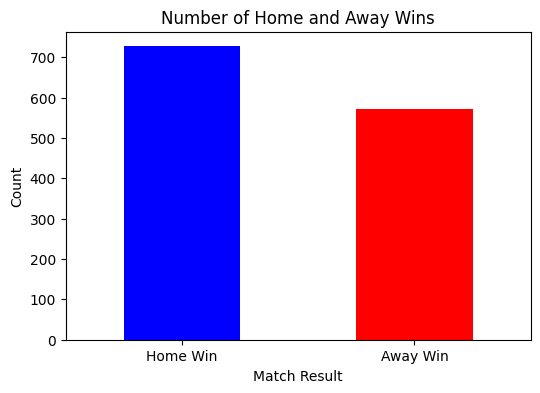

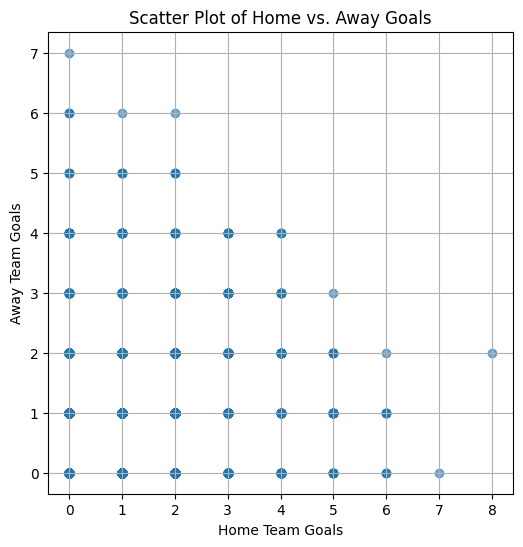

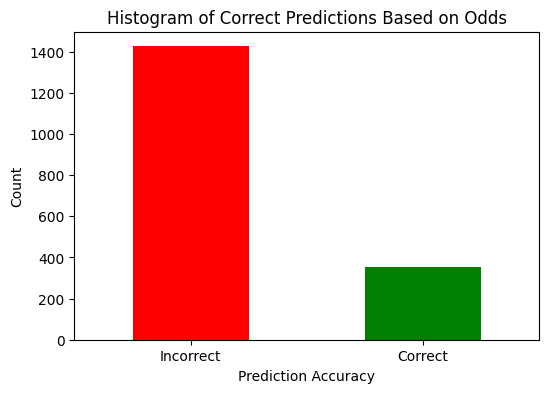

In [25]:
df_3 = italy_data
df_3['match_result'] = df_3.apply(lambda row: 'Home Win' if row['full_time_home_goals'] > row['full_time_away_goals'] 
                                  else ('Away Win' if row['full_time_home_goals'] < row['full_time_away_goals'] 
                                        else 'Draw'), axis=1)

# 1. Гистограмма побед хозяев и гостей
win_counts = df_3['match_result'].value_counts()

plt.figure(figsize=(6, 4))
win_counts[['Home Win', 'Away Win']].plot(kind='bar', color=['blue', 'red'])
plt.title("Number of Home and Away Wins")
plt.xlabel("Match Result")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 2. Диаграмма рассеяния (голы хозяев vs. голы гостей)
plt.figure(figsize=(6, 6))
plt.scatter(df_3['full_time_home_goals'], df_3['full_time_away_goals'], alpha=0.6)
plt.xlabel("Home Team Goals")
plt.ylabel("Away Team Goals")
plt.title("Scatter Plot of Home vs. Away Goals")
plt.grid(True)
plt.show()

# 3. Гистограмма правильных прогнозов
df_3['predicted_result'] = df_3.apply(lambda row: 'Home Win' if row['max_odds_home_win'] > row['max_odds_draw'] and row['max_odds_home_win'] > row['maximum_odds_away_win'] 
                                      else ('Away Win' if row['maximum_odds_away_win'] > row['max_odds_home_win'] and row['maximum_odds_away_win'] > row['max_odds_draw'] 
                                            else 'Draw'), axis=1)

df_3['correct_prediction'] = (df_3['match_result'] == df_3['predicted_result']).astype(int)

plt.figure(figsize=(6, 4))
df_3['correct_prediction'].value_counts().sort_index().plot(kind='bar', color=['red', 'green'])
plt.xticks([0, 1], ['Incorrect', 'Correct'], rotation=0)
plt.title("Histogram of Correct Predictions Based on Odds")
plt.xlabel("Prediction Accuracy")
plt.ylabel("Count")
plt.show()


In [26]:
france_urls = ['https://www.football-data.co.uk/mmz4281/2021/F1.csv', 'https://www.football-data.co.uk/mmz4281/2122/F1.csv',
                'https://www.football-data.co.uk/mmz4281/2223/F1.csv', 'https://www.football-data.co.uk/mmz4281/2324/F1.csv', 
                'https://www.football-data.co.uk/mmz4281/2425/F1.csv']
france_data = five_years_ligue_history(france_urls) 
france_data

,date,time,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,first_half_home_goals,first_half_away_goals,first_half_result,...,fouls_away,corners_home,corners_away,yellow_cards_home,yellow_cards_away,red_cards_home,red_cards_away,max_odds_home_win,max_odds_draw,maximum_odds_away_win
0,2020-08-21,18:00,Bordeaux,Nantes,0,0,D,0,0,D,...,15,2,3,2,3,1,0,2.59,3.13,3.38
1,2020-08-22,16:00,Dijon,Angers,0,1,A,0,1,A,...,8,3,9,0,0,0,0,2.86,3.22,2.92
2,2020-08-22,20:00,Lille,Rennes,1,1,D,1,0,H,...,16,4,2,0,1,1,1,2.38,3.34,3.60
3,2020-08-23,12:00,Monaco,Reims,2,2,D,1,2,A,...,14,8,1,1,3,0,0,2.00,3.65,4.50
4,2020-08-23,14:00,Lorient,Strasbourg,3,1,H,0,1,A,...,10,6,1,3,2,0,0,2.75,3.32,3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,2025-02-23,14:00,Nantes,Lens,3,1,H,1,0,H,...,18,2,11,2,4,0,1,3.75,3.65,2.13
1649,2025-02-23,16:15,Le Havre,Toulouse,1,4,A,0,1,A,...,13,5,3,0,2,1,0,4.10,3.67,2.02
1650,2025-02-23,16:15,Nice,Montpellier,2,0,H,1,0,H,...,15,8,5,1,1,0,0,1.40,5.58,8.20
1651,2025-02-23,16:15,Strasbourg,Brest,0,0,D,0,0,D,...,12,1,8,3,1,0,0,2.04,3.83,3.80


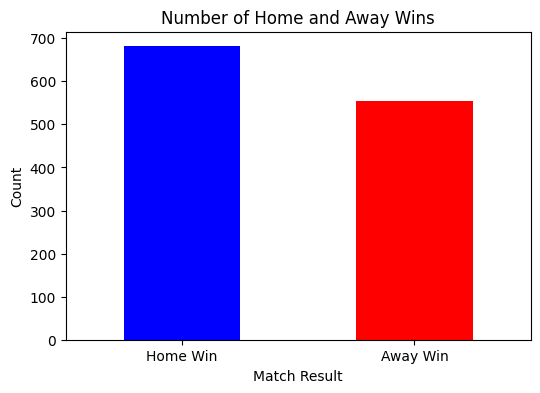

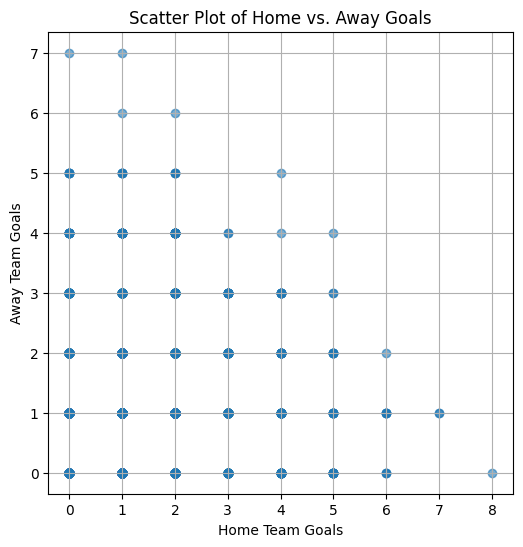

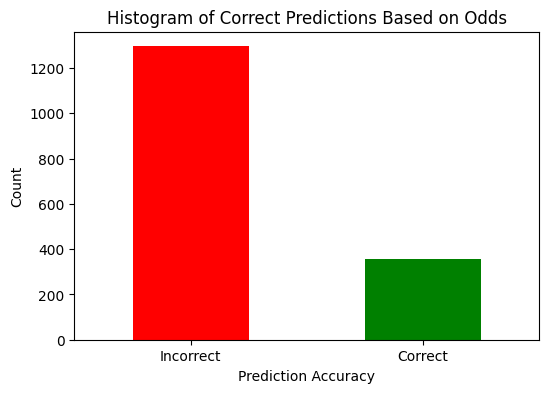

In [27]:
df_4 = france_data
df_4['match_result'] = df_4.apply(lambda row: 'Home Win' if row['full_time_home_goals'] > row['full_time_away_goals'] 
                                  else ('Away Win' if row['full_time_home_goals'] < row['full_time_away_goals'] 
                                        else 'Draw'), axis=1)

# 1. Гистограмма побед хозяев и гостей
win_counts = df_4['match_result'].value_counts()

plt.figure(figsize=(6, 4))
win_counts[['Home Win', 'Away Win']].plot(kind='bar', color=['blue', 'red'])
plt.title("Number of Home and Away Wins")
plt.xlabel("Match Result")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 2. Диаграмма рассеяния (голы хозяев vs. голы гостей)
plt.figure(figsize=(6, 6))
plt.scatter(df_4['full_time_home_goals'], df_4['full_time_away_goals'], alpha=0.6)
plt.xlabel("Home Team Goals")
plt.ylabel("Away Team Goals")
plt.title("Scatter Plot of Home vs. Away Goals")
plt.grid(True)
plt.show()

# 3. Гистограмма правильных прогнозов
df_4['predicted_result'] = df_4.apply(lambda row: 'Home Win' if row['max_odds_home_win'] > row['max_odds_draw'] and row['max_odds_home_win'] > row['maximum_odds_away_win'] 
                                      else ('Away Win' if row['maximum_odds_away_win'] > row['max_odds_home_win'] and row['maximum_odds_away_win'] > row['max_odds_draw'] 
                                            else 'Draw'), axis=1)

df_4['correct_prediction'] = (df_4['match_result'] == df_4['predicted_result']).astype(int)

plt.figure(figsize=(6, 4))
df_4['correct_prediction'].value_counts().sort_index().plot(kind='bar', color=['red', 'green'])
plt.xticks([0, 1], ['Incorrect', 'Correct'], rotation=0)
plt.title("Histogram of Correct Predictions Based on Odds")
plt.xlabel("Prediction Accuracy")
plt.ylabel("Count")
plt.show()
